# 3. In the early 1600s, Galileo was asked to explain the fact that, although the number of triples of integers (i.e. set of size 3) from 1 to 6 with sum 9 is the same as the number of such triples with sum 10, when three dice are rolles, a 9 seemed to come up less often than 10 - supposedly in the experience of gamblers

## a. Write a program to simulate the roll of three dice a large number of times and keep track of the proportion of times that the sum is 9 and the proportion of times it is 10

## b. Can you conclude from your simulations that the gamblers were correct?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5

In [3]:
def sim(n):
    results = []
    for i in range(n):
        array = np.random.randint(1,7,size=3)
        results.append(np.sum(array))
        
    return results

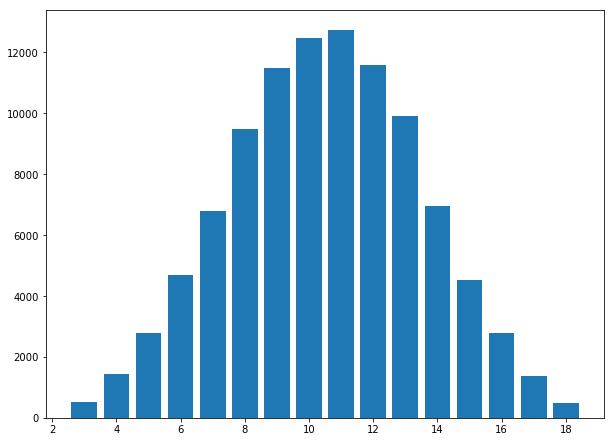

In [24]:
N_sims = 100000
data = sim(N_sims)
x = range(3,19)
y = [len([i for i in data if i ==x_val]) for x_val in x]
plt.bar(x,y)
plt.show()

# Seems that the gamblers were right

___
# Appendix: Looking at paths to each score

- Looping through possible combinations to see different final scores

In [29]:
list_of_rolls = []
dict_paths = {num:[] for num in range(3,19)}

for roll_1 in range(1,7):
    for roll_2 in range(1,7):
        for roll_3 in range(1,7):
            path = (roll_1, roll_2, roll_3)
            score = roll_1+roll_2+roll_3
            list_temp = dict_paths[score]
            list_temp.append(path)
            dict_paths[score] = list_temp

In [31]:
x = range(3,19)
y=[]

for num in dict_paths.keys():
    y.append(len(dict_paths[num]))

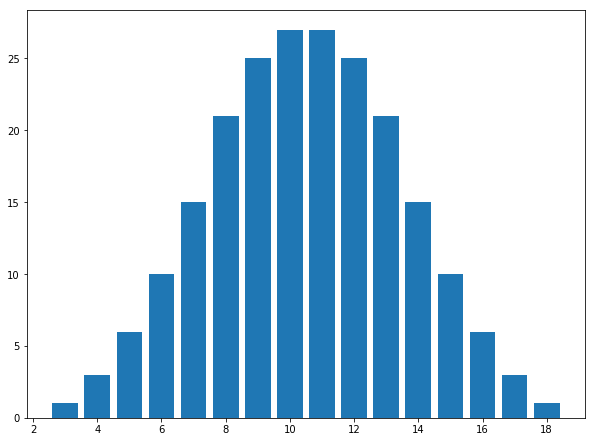

In [34]:
plt.bar(x,y)
plt.show()

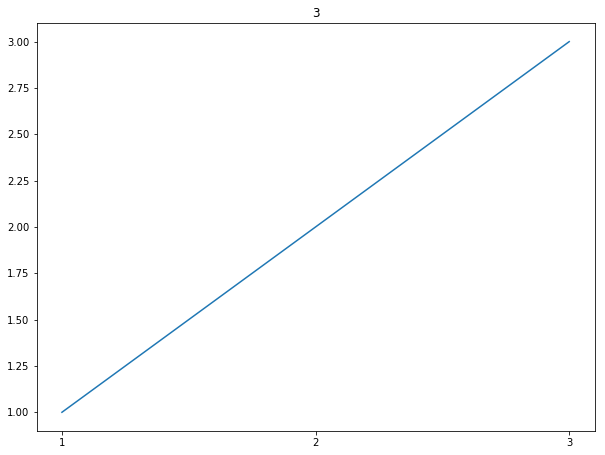

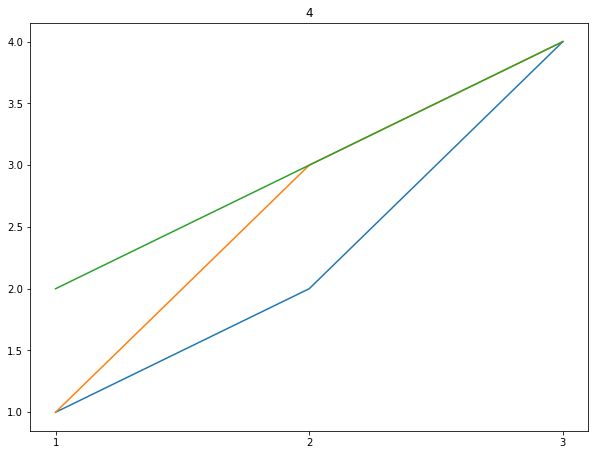

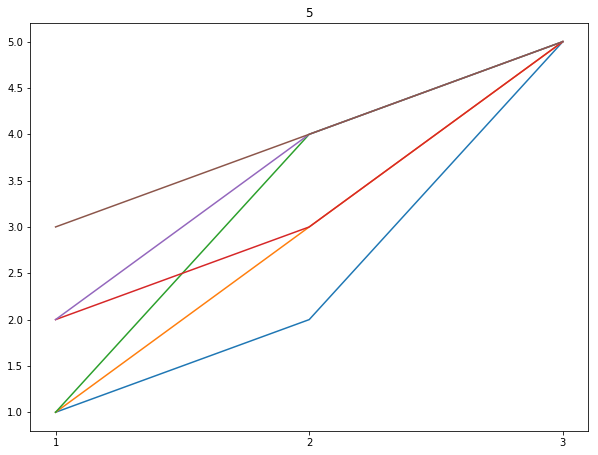

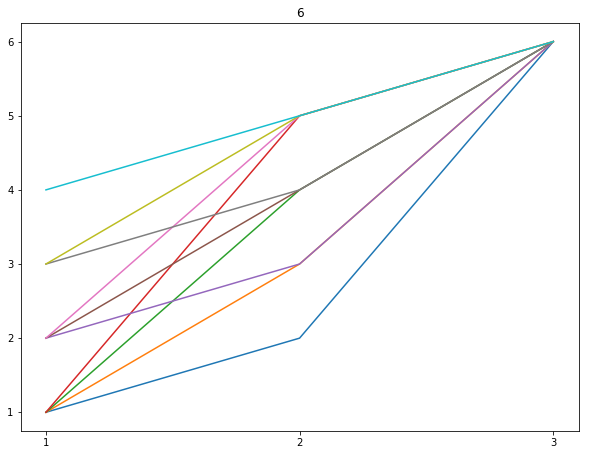

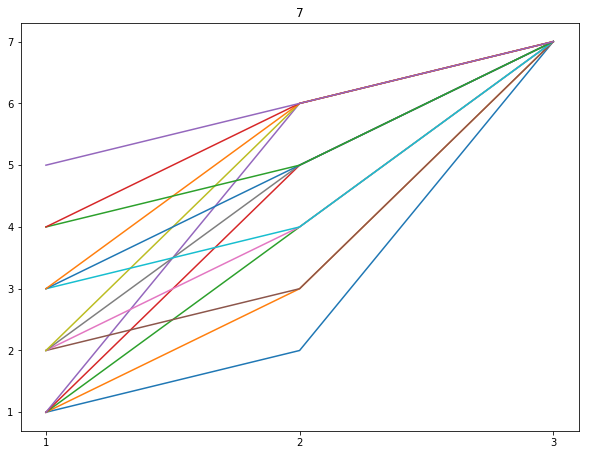

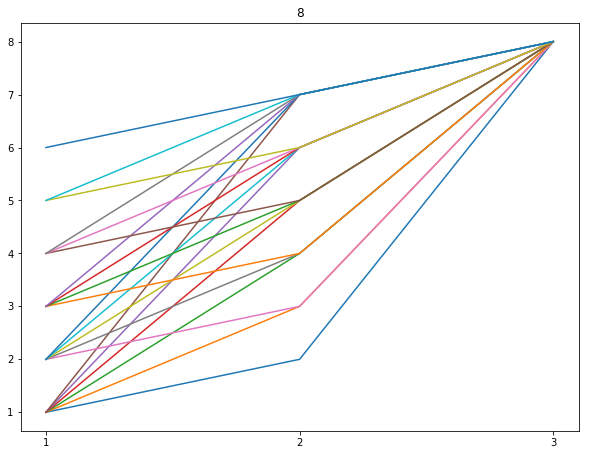

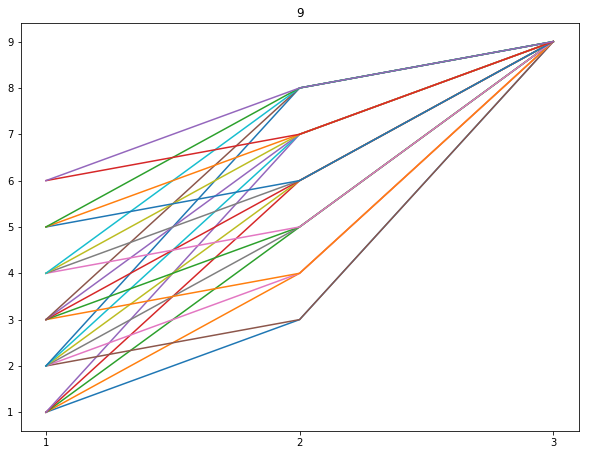

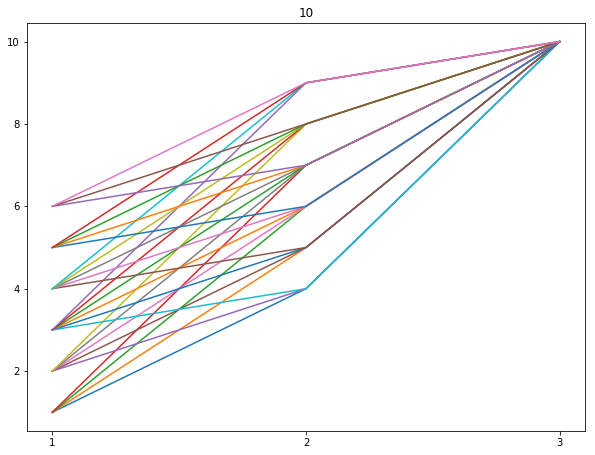

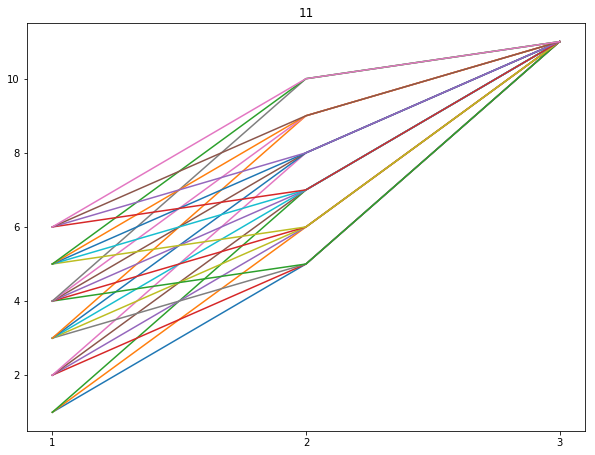

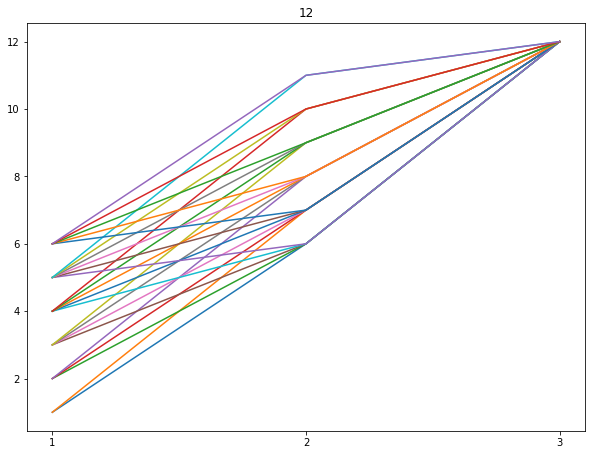

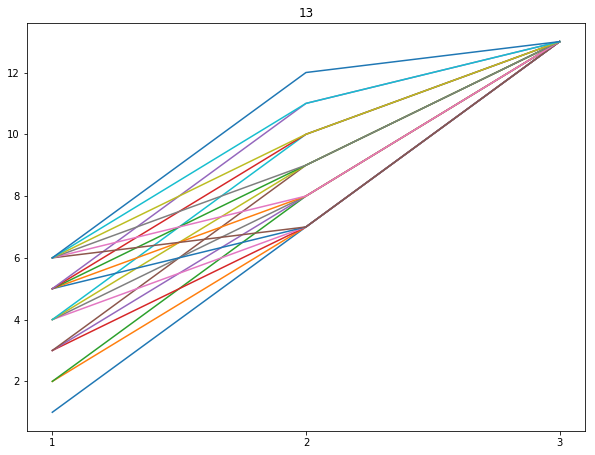

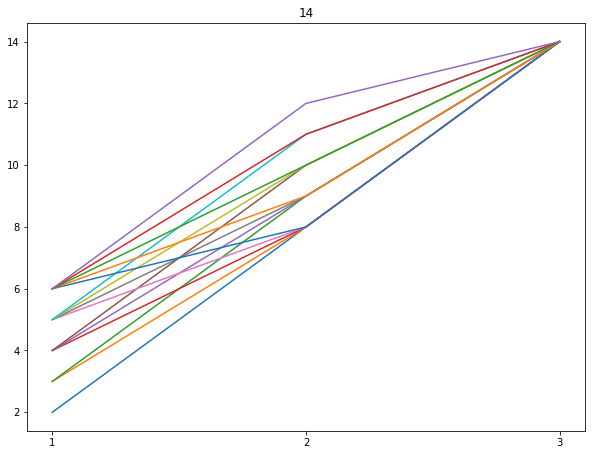

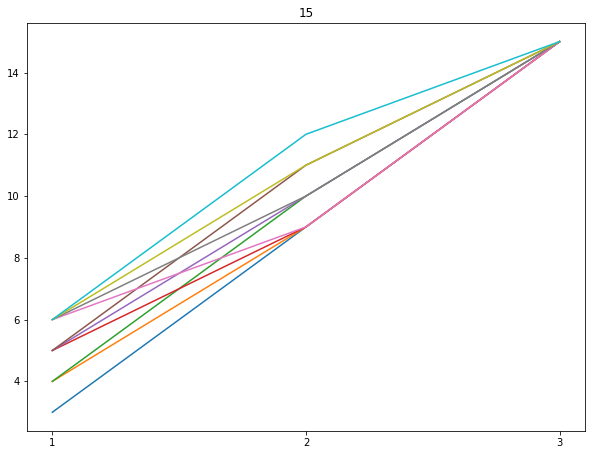

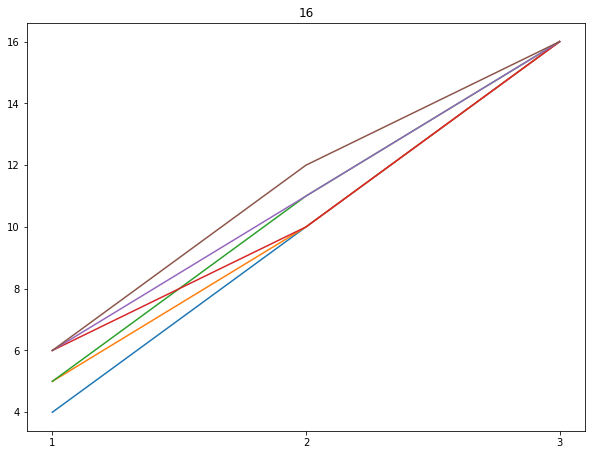

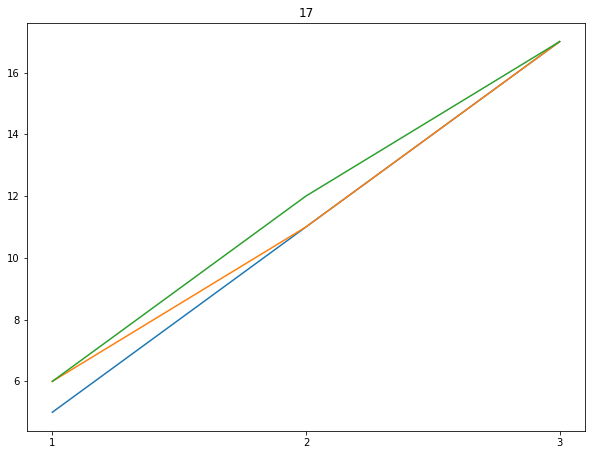

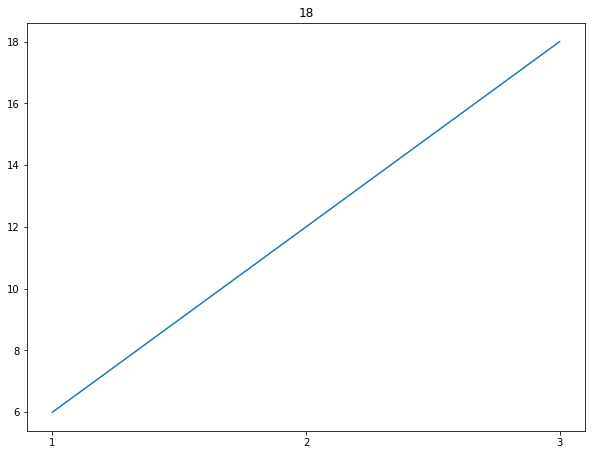

In [41]:
for num in dict_paths.keys():
    tuples = dict_paths[num]
    paths = [np.cumsum(x) for x in tuples]
    x = [1,2,3]
    for path in paths:
        plt.plot(x,path)
        plt.title(str(num))
    my_xticks = ['1', '2', '3']
    plt.xticks(x, my_xticks)
    plt.show()